## The In and Out

* This tutorial teaches you the necessary skills to deliver valuable insights from data using Python’s data analysis library, Pandas. The data sets used in this tutorial is available and taken from Kaggle.

##### So what’re the prerequisites?

* Mandatory — Working knowledge of python(3.x).
* Mandatory — Jupyter notebook provided by Anaconda.
* Optional — Working knowledge of basic python data science libraries like NumPy, Scipy, Matplotlib, and Seaborn.
* What will you gain?
* Get a complete hands-on guide on Pandas methods and attributes listed below and learn not just syntax, rather how to use them in a scenario to perform extensive exploratory data analysis.

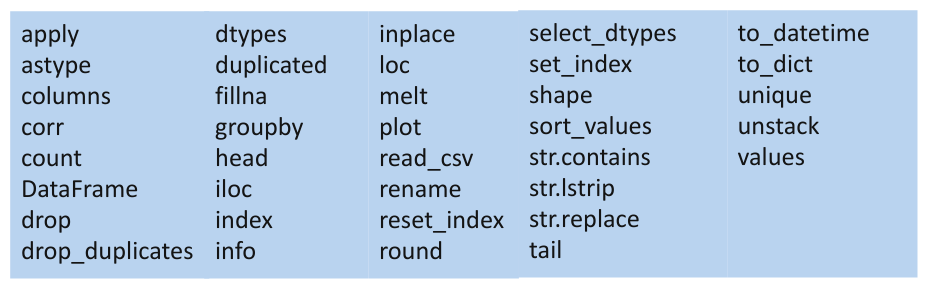

## Case objective

##### To deliver what does it takes for an app to get a 5 star rating on Google Play Store.

##### The tutorial has been partitioned into two sections —

* I. Getting the case ready — here you’ll tidy the data by using basic functionalities of Pandas like data cleaning, handling missing data, duplicate data and outliers.
* II. Answering the mysteries — here you’ll fetch information and insights using Pandas visualisation (plus visualisation from other lib) to uncover rumours and arrive at a decision.

## Getting the case ready

* Consider a data set named Google Play Store Apps available on Kaggle. Download it and extract the data which will give you two CSV files.
* Next, we need to load the file (googleplaystore.csv) into python environment using Pandas. Think of Pandas as an alternative to MS Excel available within Python but with more advanced features and of course with a great community support, not to mention the Stack Overflow community support ;). Pandas consists of two objects namely Series and DataFrame. A DataFrame holds a 2D matrix while a Series holds a 1D matrix. Since we have a CSV file to load, hence we’ll rely on a DataFrame.

## Getting the case ready

* Data cleaning
* Dealing with missing values
* A tryout
* Checking duplicate entries
* Checking outliers
* Answering the mysteries
* Uncovering the rumours
* Mining Insights

### Necessary libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Loading the data set

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.3 MB


In [3]:
df.columns           #  <- retrieves all column names
df.index             #  <- retrieves all index values
df.values            #  <- retrieves main body of df
df.dtypes            #  <- retrieves datatype of each column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Renaming the columns

In [4]:
df.rename(columns={'Content Rating': 'ContentRating',
                  'Last Updated': 'LastUpdated',
                  'Current Ver': 'CurrentVer',
                  'Android Ver': 'AndroidVer'}, inplace=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

### Data cleaning

In [5]:
# Fetching the entity which has string
df.Reviews[df.Reviews.str.contains('[^0-9]')]

10472    3.0M
Name: Reviews, dtype: object

In [6]:
df.Size[df.Size.str.contains('[^0-9]')].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [7]:
df.Installs[df.Installs.str.contains('[a-z]')]

10472    Free
Name: Installs, dtype: object

In [8]:
df.Price[df.Price.str.contains('[a-z]')]

10472    Everyone
Name: Price, dtype: object

In [9]:
# Dropping row 10472
df.drop(10472, inplace=True)

In [10]:
# Changing the datatype of Reviews column back to numeric
df.Reviews = df.Reviews.astype(int)

In [11]:
df.loc[5:10, 'Installs']

5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
10    1,000,000+
Name: Installs, dtype: object

In [12]:
df.iloc[1832:1839, 7]

1832    $1.99
1833    $4.99
1834    $4.99
1835    $4.99
1836    $5.99
1837    $6.99
1838    $9.99
Name: Price, dtype: object

In [13]:
df.Installs = df.Installs.str.replace(',','')   # Replacing ',' with ''
df.Installs.head()

0       10000+
1      500000+
2     5000000+
3    50000000+
4      100000+
Name: Installs, dtype: object

In [14]:
df.Installs = df.Installs.str.replace('+','').astype(int) #Replacing '+' with '' and converting datatype back to numeric
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [15]:
df.Price = df.Price.str.lstrip('$').astype(np.float32)
df.iloc[1832:1839, 7]

1832    1.99
1833    4.99
1834    4.99
1835    4.99
1836    5.99
1837    6.99
1838    9.99
Name: Price, dtype: float32

### Reformatting Size column

In [16]:
m = {'k': 3, 'M': 6}
df.Size = [int(float(i[:-1]) * 10 ** m[i[-1]]) if i != 'Varies with device' else i for i in df.Size]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10840 non-null  object 
 1   Category       10840 non-null  object 
 2   Rating         9366 non-null   float64
 3   Reviews        10840 non-null  int32  
 4   Size           10840 non-null  object 
 5   Installs       10840 non-null  int32  
 6   Type           10839 non-null  object 
 7   Price          10840 non-null  float32
 8   ContentRating  10840 non-null  object 
 9   Genres         10840 non-null  object 
 10  LastUpdated    10840 non-null  object 
 11  CurrentVer     10832 non-null  object 
 12  AndroidVer     10838 non-null  object 
dtypes: float32(1), float64(1), int32(2), object(9)
memory usage: 1.3+ MB


### Dealing with missing values

In [18]:
actual_values = df.count()
total_values = df.shape[0]
miss_perct = np.round((1 - (actual_values/total_values)) * 100, 2)
miss_perct

App               0.00
Category          0.00
Rating           13.60
Reviews           0.00
Size              0.00
Installs          0.00
Type              0.01
Price             0.00
ContentRating     0.00
Genres            0.00
LastUpdated       0.00
CurrentVer        0.07
AndroidVer        0.02
dtype: float64

In [19]:
type(miss_perct)

pandas.core.series.Series

### A tryout

In [20]:
# Method 1
df_miss = pd.DataFrame(miss_perct.values, index=miss_perct.index, columns=['percent'])

# # Method 2
# df_miss = pd.DataFrame(miss_perct, columns=['percent'])

df_miss

,percent
App,0.00
Category,0.00
Rating,13.60
Reviews,0.00
Size,0.00
Installs,0.00
Type,0.01
Price,0.00
ContentRating,0.00
Genres,0.00


In [21]:
# Number of missing values per column
df_miss['miss_count'] = len(df) - df.count()
df_miss.head()

,percent,miss_count
App,0.0,0
Category,0.0,0
Rating,13.6,1474
Reviews,0.0,0
Size,0.0,0


In [22]:
df_miss.tail(8)

,percent,miss_count
Installs,0.00,0
Type,0.01,1
Price,0.00,0
ContentRating,0.00,0
Genres,0.00,0
LastUpdated,0.00,0
CurrentVer,0.07,8
AndroidVer,0.02,2


In [23]:
# Adding index values as new column to make it as tidy-dataframe for input to seaborn
df_miss = df_miss.reset_index()  # <- If you add reset_index(drop=True) then index column is dropped
df_miss.head(3)

,index,percent,miss_count
0,App,0.0,0
1,Category,0.0,0
2,Rating,13.6,1474


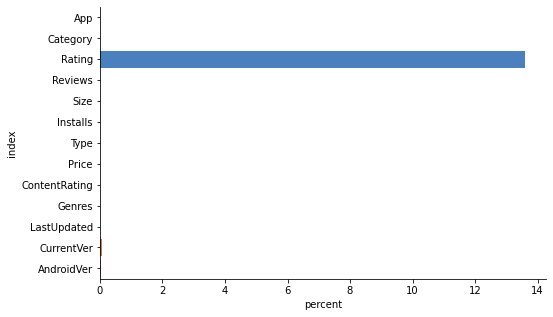

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="percent", y="index", data=df_miss, palette='icefire')
sns.despine()
plt.show()

In [25]:
# Filling missing values in Quantitative feature by median
for col in df.select_dtypes('float64'):
    df.loc[:, col].fillna(df.loc[:, col].median(), inplace=True)

In [26]:
# Filling missing values in Qualitative feature by mode
for col in df.select_dtypes('object'):
    df.loc[:, col].fillna(sp.stats.mode(df.loc[:, col].astype(str))[0][0], inplace=True)

### Checking duplicate entries

In [27]:
total_duplicates = len(df[df.duplicated()])
total_duplicates

483

In [28]:
print('The data has ' + str(np.round(total_duplicates/len(df) * 100, 2)) + '% of duplicate data')

The data has 4.46% of duplicate data


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
print('New shape of data set: ' + str(df.shape))

New shape of data set: (10357, 13)


In [31]:
# Also let us check if duplicate entries of Apps are present or not
app_duplicates = len(df[df.App.duplicated()])
app_duplicates

698

In [32]:
print('The data has ' + str(np.round(app_duplicates/len(df) * 100, 2)) + '% of duplicate apps')

The data has 6.74% of duplicate apps


In [33]:
df = df[~df.App.duplicated()].reset_index(drop=True)
df.shape

(9659, 13)

### Checking outliers

In [34]:
# Selecting required features and storing them into a new dataframe
df_temp = df.loc[:,['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

In [35]:
# Replacing 'Varies with device' values under Size column with 0
df_temp.Size.replace('Varies with device', 0, inplace=True)

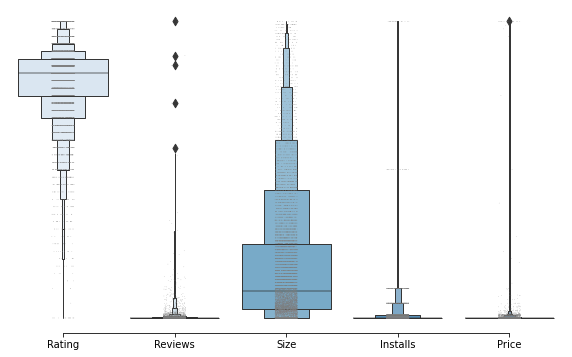

In [36]:
# Normalizing values to visualize each feature in one plot
temp = pd.melt(pd.DataFrame(MinMaxScaler().fit_transform(df_temp)))

plt.figure(figsize=(10,6))
sns.boxenplot(x='variable', y='value', data=temp, palette='Blues')
sns.stripplot(x='variable', y='value', data=temp, size=0.5, jitter=True, color="gray")
plt.xticks(np.arange(df_temp.shape[1]), df_temp.columns)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True,trim=True)
plt.show()

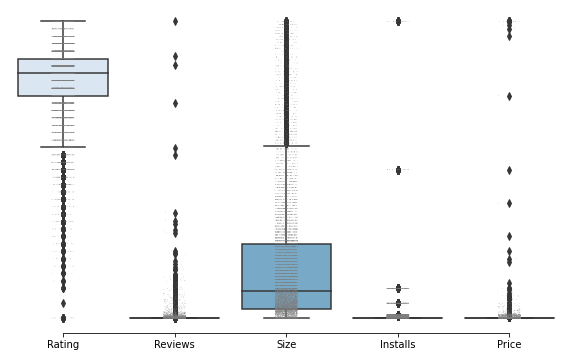

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='variable', y='value', data=temp, palette='Blues')
sns.stripplot(x='variable', y='value', data=temp, size=0.5, jitter=True, color="gray")
plt.xticks(np.arange(df_temp.shape[1]), df_temp.columns)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True,trim=True)
plt.show()

### Answering the mysteries
### Uncovering the rumours

### Pairplot and correlation heatmap

<Figure size 504x360 with 0 Axes>

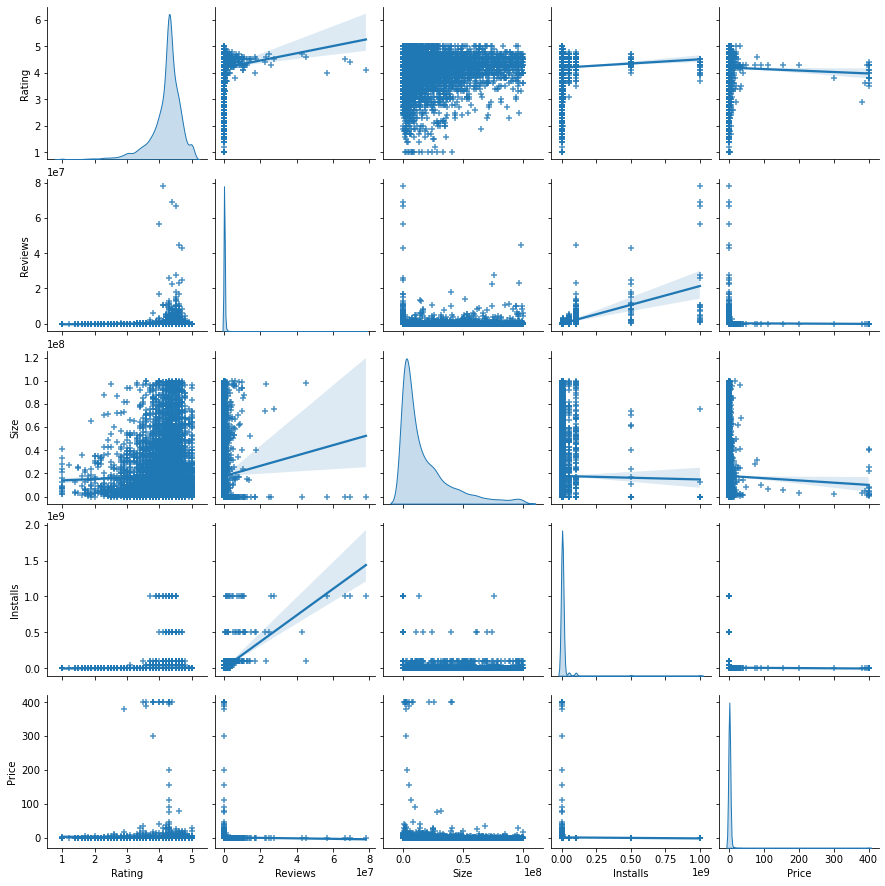

In [38]:
plt.figure(figsize=(7, 5))

sns.pairplot(df_temp, kind='reg', diag_kind='kde', markers='+')

plt.show()

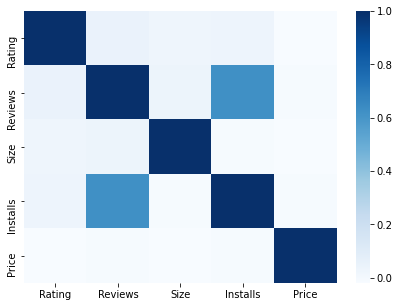

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(df_temp.corr(), cmap='Blues')
plt.show()

#### 1. Division of apps rating

In [40]:
rate = df.Rating.apply(lambda x: np.round(x * 2)/2) # Rounding to the nearest 0.5
# Retrieving the frequency of each unique rating
val, cnt = np.unique(rate, return_counts=True)
df_rate = pd.DataFrame([val, cnt]).T
df_rate.columns = ['val', 'cnt']

#### 2. Ratio of app type as per app rating

In [43]:
df_rating_type = pd.DataFrame([rate, df.Type]).T

#### 3. App rating per type of content

In [44]:
df_rating_content = pd.DataFrame([rate, df.ContentRating]).T

#### 4. Ratio of rating per top 6 genres

In [45]:
df_rating_genres = pd.DataFrame([rate, df.Genres]).T
# Finding top 6 Genres with highest number of apps 
val_g, cnt_g = np.unique(df_rating_genres.Genres, return_counts=True)
df_genres = pd.DataFrame([val_g, cnt_g]).T
df_genres.columns = ['Genres', 'Count']
df_genres.sort_values('Count', ascending=False, inplace=True)
df_genres = df_genres.iloc[:6,:].reset_index(drop=True) 
# Subsetting dataframe for rows containing only these 6 generes
df_rating_genres = df_rating_genres[df_rating_genres.Genres.isin(df_genres.Genres)]

#### 5. Number of apps per category

In [46]:
ratio_cat_app = df.groupby('Category')['App'].count().reset_index()
ratio_cat_app.sort_values('App', ascending=False, inplace=True)

#### 6. Number of updates in each months, years and each year's months

In [47]:
# Converting the LastUpdated column to date column
df.LastUpdated = pd.to_datetime(df.LastUpdated, format='%B %d, %Y')
df.LastUpdated.head(2)

# 0   2018-01-07
# 1   2018-01-15
# Name: LastUpdated, dtype: datetime64[ns]

val_y, cnt_y = np.unique(df.LastUpdated.dt.year, return_counts=True)
val_m, cnt_m = np.unique(df.LastUpdated.dt.month, return_counts=True)

df_date = pd.DataFrame(df.LastUpdated.astype(str).str.split('-').tolist(), columns=list('YMD'))
df_date.head(3)

#      Y  M  D
# 0 2018 01 07
# 1 2018 01 15
# 2 2018 08 01

date_temp = df_date.groupby(['M','Y']).apply(lambda x: len(x)).unstack()                
date_temp.fillna(0, inplace=True)

# Generating sequence of Months
from datetime import datetime
months_seq = [datetime.strftime(datetime.strptime(str(_), "%m"), "%b") for _ in range(1,13)]

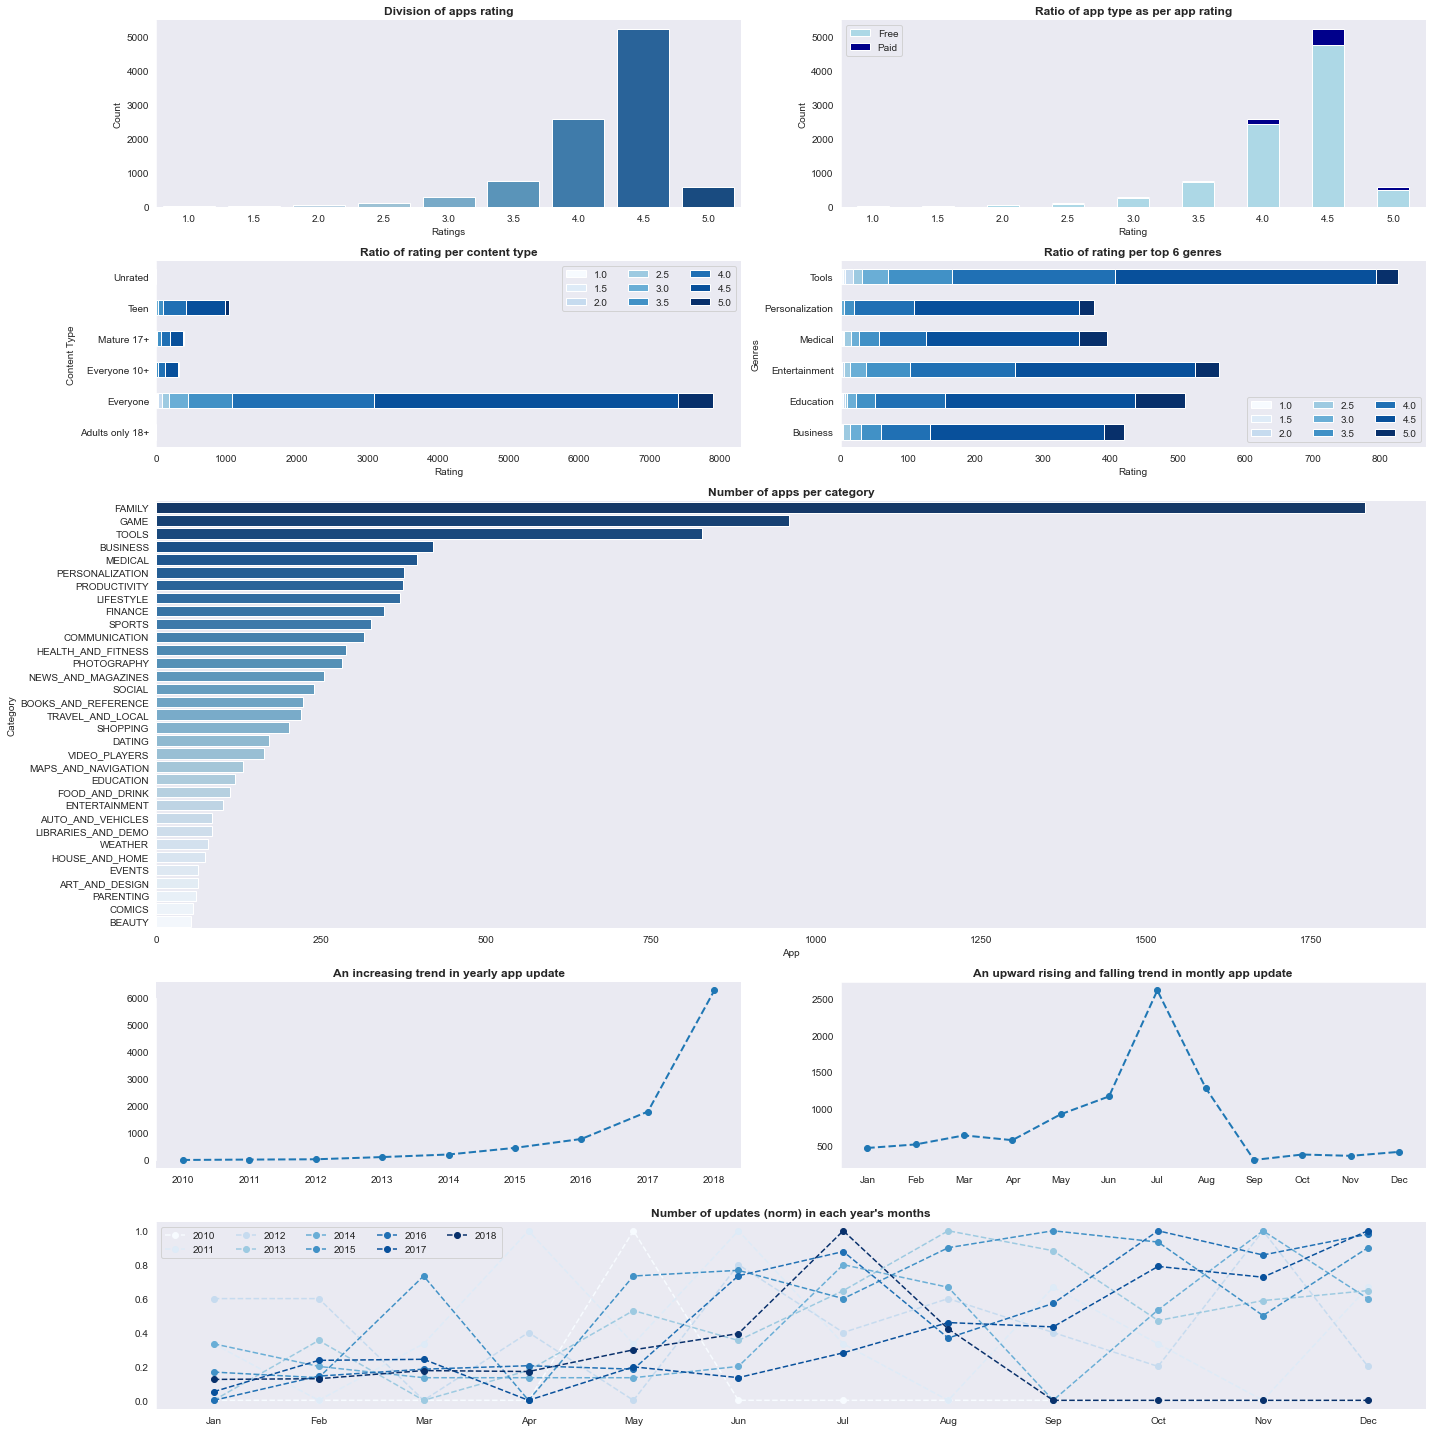

In [48]:
# 1 
plt.figure(figsize=(20, 20))
sns.set_style('dark')
row_mask = 6
col_mask = 2

ax1 = plt.subplot2grid((row_mask, col_mask), (0,0))
sns.barplot(x='val', y='cnt', data=df_rate, palette='Blues', ax=ax1)
sns.despine(ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Ratings')
ax1.set_title('Division of apps rating', weight='bold')


# 2
ax2 = plt.subplot2grid((row_mask, col_mask), (0,1))
df_rating_type.groupby(['Rating', 'Type']).\
            apply(lambda x: len(x)).unstack().\
            plot.bar(stacked=True, 
                    rot=0, color= ['lightblue', 'darkblue'], ax=ax2)
sns.despine(ax=ax2)
ax2.legend(loc='upper left')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Count')
ax2.set_title('Ratio of app type as per app rating', weight='bold')

# 3
ax3 = plt.subplot2grid((row_mask, col_mask), (1,0))
df_rating_content.groupby(['ContentRating', 'Rating']).\
                apply(lambda x: len(x)).unstack().\
                plot(kind='barh', stacked=True, 
                     rot=0, colormap='Blues', ax=ax3)
sns.despine(ax=ax3)
ax3.legend(loc='upper right', ncol=3)
ax3.set_xlabel('Rating')
ax3.set_ylabel('Content Type')
ax3.set_title('Ratio of rating per content type', weight='bold')


# 4
ax4 = plt.subplot2grid((row_mask, col_mask), (1,1))
df_rating_genres.groupby(['Genres', 'Rating']).\
                apply(lambda x: len(x)).unstack().\
                plot(kind='barh', stacked=True, 
                     rot=0, colormap='Blues', ax=ax4)
sns.despine(ax=ax4)
ax4.legend(loc='lower right', ncol=3)
ax4.set_xlabel('Rating')
ax4.set_title('Ratio of rating per top 6 genres', weight='bold')


# 5

ax5 = plt.subplot2grid((row_mask, col_mask), (2,0), rowspan=2, colspan=2)
sns.barplot(x='App', y='Category', data=ratio_cat_app, palette='Blues_r', ax=ax5)
sns.despine(ax=ax5)
ax5.set_title('Number of apps per category', weight='bold')


# 6a
ax6a = plt.subplot2grid((row_mask, col_mask), (4,0))
ax6a.plot(val_y, cnt_y, '--o', linewidth=2)
sns.despine(trim=True, ax=ax6a)
ax6a.set_title('An increasing trend in yearly app update', weight='bold')

# 6b
ax6b = plt.subplot2grid((row_mask, col_mask), (4,1))
ax6b.plot(months_seq, cnt_m, '--o', linewidth=2)
ax6b.set_title('An upward rising and falling trend in montly app update', weight='bold')


# 6c
ax6c = plt.subplot2grid((row_mask, col_mask), (5,0), colspan=2)
# Normalizing values so that all values can be visualized without any bias
pd.DataFrame(MinMaxScaler().fit_transform(date_temp), index=months_seq, columns=date_temp.columns).\
                plot(kind='line', style='--o', colormap='Blues', xticks=np.arange(12), ax=ax6c) 
ax6c.set_title('Number of updates (norm) in each year\'s months', weight='bold')
ax6c.legend(loc='upper left', ncol=5)
sns.despine(ax=ax6c)

plt.tight_layout()
plt.show()

## Questions:

* Division of apps rating i.e. extracting number of apps per 0.5 step rating.
* Ratio of app type as per app rating i.e. in each 0.5 step rating how many number of free and paid apps are available.
* Ratio of rating per content type i.e. for each category what is the ratio of 0.5 step rating.
* Ratio of rating per top 6 genres i.e. selecting only top 6 genres based on the maximum count of apps and getting the ratio of 0.5 step rating.
* Number of apps per category.
* Number of apps updated yearly.
* Number of apps updated monthly.
* Number of apps updated in each year’s months.

## Take-away from above figure —

* Maximum number of apps are rated 4.5 on a scale of 5 having step size 0.5.
* Number of free apps are more than paid apps on each rating scale.
* Apps meant for Everyone take lead in maximum number of apps followed by Teen and Mature 17+. Rating per content type is illustrated above.
* Top Genres include Tools, Entertainment and Education, each having maximum number of rating as 4.5.
* Top three categories with maximum number of apps include Family, Game and Tools.
* Maximum number of apps get updated as years pass by. Hence, an upward pattern.
* Combining all years data, maximum number of apps are updated during summer i.e. July.
* Each year, high update frequency is observed after month of April.

In [49]:
sns.set_style('white')

#### Wordclouds

#### Mining insights

* So far, we have learnt various attributes and methods available in Pandas and also verified various known information. Now let us fetch the insights i.e. unknown information which adds value in further decision making.
* The goal of this case is to understand —
* What does it takes for an app to be rated as 5 star on Google Play Store?
* So let us try to answer it.

In [50]:
from wordcloud import WordCloud
import random

# Function to create gray wordcloud. 
# Credit: https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [51]:
# Creating dictionary of features against app names
wc_rating = pd.DataFrame(df_temp.Rating).set_index(df.App).to_dict()['Rating']
wc_reviews = pd.DataFrame(df_temp.Reviews).set_index(df.App).to_dict()['Reviews']
wc_size = pd.DataFrame(df_temp.Size).set_index(df.App).to_dict()['Size']
wc_installs = pd.DataFrame(df_temp.Installs).set_index(df.App).to_dict()['Installs']

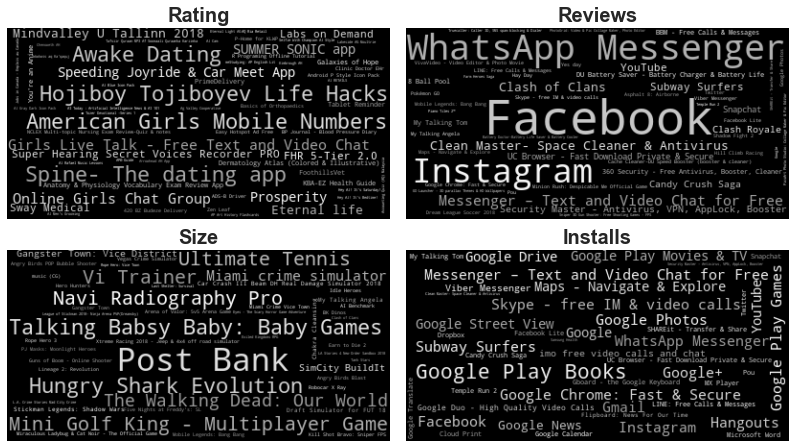

In [52]:
plt.figure(figsize=(14, 8))

r_c = 8

ax7 = plt.subplot2grid((r_c, r_c), (0,0), colspan=4, rowspan=4)
wc1 = WordCloud()
wc1.generate_from_frequencies(frequencies=wc_rating)
ax7.imshow(wc1.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax7.set_title('Rating', weight='bold', size=20)
ax7.axis("off")

ax8 = plt.subplot2grid((r_c, r_c), (0,4), colspan=4, rowspan=4)
wc2 = WordCloud()
wc2.generate_from_frequencies(frequencies=wc_reviews)
ax8.imshow(wc2.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax8.set_title('Reviews', weight='bold', size=20)
ax8.axis("off")

ax9 = plt.subplot2grid((r_c, r_c), (4,0), colspan=4, rowspan=4)
wc3 = WordCloud()
wc3.generate_from_frequencies(frequencies=wc_size)
ax9.imshow(wc3.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax9.set_title('Size', weight='bold', size=20)
ax9.axis("off")

ax10 = plt.subplot2grid((r_c, r_c), (4,4), colspan=4, rowspan=4)
wc4 = WordCloud()
wc4.generate_from_frequencies(frequencies=wc_installs)
ax10.imshow(wc4.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax10.set_title('Installs', weight='bold', size=20)
ax10.axis("off")

plt.show()

In [53]:
print('Number of unique apps with 5 star rating: ', len(df[df.Rating == 5.0]))

Number of unique apps with 5 star rating:  271


In [54]:
df_5star = df[df.Rating == 5.0].reset_index() # Saving index to access Size from df_temp

In [55]:
features = [
    df_5star.Category,
    df_5star.Reviews,
    df_temp.iloc[df_5star.iloc[:, 0],:].Size,
    df_5star.Installs,
    df_5star.Type,
    df_5star.ContentRating,
    df_5star.Genres,
    df_5star.LastUpdated,
    df_5star.AndroidVer
]

df_expect = pd.DataFrame(index=['Category', 'Reviews', 'Size', 'Installs', 
                                'Type', 'Content Rating', 'Genres', 'Last Updated', 'Android Version'],
                        columns=['Values'])

cnt = 0
for fea in features:
    val_t, cnt_t = np.unique(fea, return_counts=True)
    df_expect.iloc[cnt, 0] = pd.DataFrame([val_t, cnt_t]).T.sort_values(1, ascending=False).iloc[0,0]
    cnt += 1

df_expect

,Values
Category,FAMILY
Reviews,1
Size,11000000
Installs,100
Type,Free
Content Rating,Everyone
Genres,Education
Last Updated,2018-07-24 00:00:00
Android Version,4.1 and up


* Therefore, according to our analysis our newbie Sherlock can point out that for an app to have a 5 star rating above values are the keys.

#### In summary, to be a 5 star app, it should be free of cost, built for everyone and should emphasise on education and family. Also, it should maintain at least 1 review, 100 installs and can consume nearly 11 MB of disk space, hence need to be light weight. Finally, it should be frequently updated and kept for android version 4.1 and up.